In [1]:
import mvp
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
DB_PATH = '/home/naga/FintelligenceData/MetaTrader_M1.db'
petr3_raw = mvp.rawdata.RawData('PETR3',DB_PATH)
petr3_raw.df = petr3_raw.change_sample_interval(start = pd.Timestamp('2019-01-20 10:15:00'),stop = pd.Timestamp('2020-12-20 10:15:00'),time_step=60)

In [2]:
parameters = {'ModelParameters':{'threshold':0.01}}
model_classical = mvp.primary.PrimaryModel(petr3_raw,'classical-filter',parameters)

In [13]:
parameters = {'ModelParameters':{'MA':[50,200]}}
model_MA = mvp.primary.PrimaryModel(petr3_raw,'crossing-MA',parameters)

In [4]:
parameters = {'ModelParameters':{'MA':[100],'DEV':[100],'K_value':2}}
model_bollinger = mvp.primary.PrimaryModel(petr3_raw,'bollinger-bands',parameters)

In [14]:
parameters = {'SL': 0.10, 'TP': 0.80, 'IH': 1000}
labels_MA = mvp.labels.Labels(model_MA.events_df,parameters,'suggestion')
labels_classical = mvp.labels.Labels(model_classical.events_df,parameters,'suggestion')
labels_bollinger = mvp.labels.Labels(model_bollinger.events_df,parameters,'suggestion')

In [15]:
labels_MA.labeled_df

,Suggestion,Label,EndDateTime
DateTime,,,
2019-03-18 14:00:00,-1.0,-1.0,2019-03-19 13:00:00
2019-04-23 15:00:00,1.0,-1.0,2019-04-24 12:00:00
2019-06-13 16:00:00,-1.0,1.0,2019-06-14 14:00:00
2019-07-29 12:00:00,1.0,-1.0,2019-08-01 15:00:00
2019-09-10 12:00:00,-1.0,1.0,2019-09-11 13:00:00
2019-10-15 12:00:00,1.0,-1.0,2019-10-18 15:00:00
2019-10-17 13:00:00,-1.0,1.0,2019-10-18 15:00:00
2019-12-02 16:00:00,1.0,-1.0,2019-12-03 12:00:00
2019-12-13 16:00:00,-1.0,-1.0,2019-12-18 15:00:00


In [36]:

df['Labels'] = labels
data = model.feature_data.df_curated
data['UpBand'] = data['MA_100'] + 2*data['DEV_100']
data['DownBand'] = data['MA_100'] - 2*data['DEV_100']
total = pd.concat([data,df.set_index('DateTime')],axis=1)
total.drop(columns=['Open','High','Low','Volume','TickVol','DEV_100'],inplace=True)

In [37]:
buy_profit = total[(total['Trigger']==1) & (total['Labels']==1)][['Close']]
buy_loss = total[(total['Trigger']==1) & (total['Labels']==-1)][['Close']]
buy_neutral = total[(total['Trigger']==1) & (total['Labels']==0)][['Close']]

<AxesSubplot:xlabel='DateTime'>

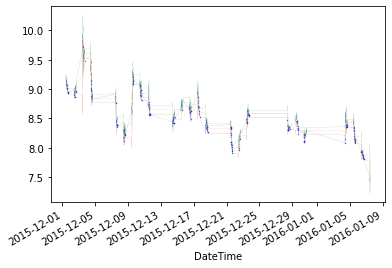

In [38]:
plt.scatter(buy_profit.index, buy_profit['Close'], c='g', s = 0.1)
plt.scatter(buy_loss.index, buy_loss['Close'], c='r', s = 0.1)
plt.scatter(buy_neutral.index, buy_neutral['Close'], c='b', s = 0.1)
total.Close.plot(linewidth = 0.1)
total.MA_100.plot(linewidth = 0.1)
total.UpBand.plot(linewidth = 0.1)
total.DownBand.plot(linewidth = 0.1)

In [84]:
len(buy_profit.index)*model.operation_parameters['TP'] - len(buy_loss.index)*model.operation_parameters['SL']

28.0

In [10]:
parameters = {'ModelParameters':{'threshold':0.01}, 'OperationParameters':{'SL': 1.00, 'TP': 2.00, 'IH': 1000}}
model_CS = mvp.primary.PrimaryModel(petr3_raw,'classical-filter',parameters)

In [12]:
model_CS.events()

,Trigger
DateTime,
2016-02-05 14:00:00,-1
2016-02-10 15:00:00,1
2016-02-11 11:00:00,-1
2016-03-08 11:00:00,1
2016-03-08 12:00:00,-1
...,...
2020-11-16 15:00:00,-1
2020-11-17 11:00:00,-1
2020-11-17 12:00:00,1


In [42]:
petr3_raw.df

,Open,High,Low,Close,TickVol,Volume
CloseTime,,,,,,
2019-01-21 12:00:00,28.12,28.23,28.07,28.17,2299,353100
2019-01-21 13:00:00,28.17,28.26,28.14,28.17,512,130300
2019-01-21 14:00:00,28.17,28.24,28.10,28.23,642,212600
2019-01-21 15:00:00,28.21,28.33,28.19,28.29,809,313500
2019-01-21 16:00:00,28.29,28.49,28.29,28.46,1430,747800
...,...,...,...,...,...,...
2020-11-30 13:00:00,26.22,26.34,26.01,26.24,4002,2632200
2020-11-30 14:00:00,26.23,26.25,25.58,25.64,6469,4625100
2020-11-30 15:00:00,25.71,26.03,25.62,25.94,4006,2917000
